In [12]:
# Jairo Andres Saavedra Alfonso
# 01 de Febrero de 2019
# Universidad de Los Andes
# Phycis 
######################__________________Report 01__________________######################

In [13]:
#Packages
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.table import Table

In [14]:
# Reading data from truth_DR12Q.fits. This file have the database sample of spectra with human-expert classifitacion

hdul = fits.open('Superset_DR12Q.fits') # Open file
info=hdul.info() # File info
columns=hdul[1].columns # File Columns 
print(info,'/n',columns)
data=hdul[1].data # Database of spectra with human-expert classifications 
print(data['THING_ID'])

Filename: Superset_DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3111,)   uint8   
  1  Superset_DR12Q_v2_6.fits    1 BinTableHDU    104   546856R x 23C   [18A, D, D, J, J, J, J, D, E, E, J, J, J, I, K, K, K, K, 5E, 5E, 5E, 5E, 5E]   
None /n ColDefs(
    name = 'SDSS_NAME'; format = '18A'; unit = '-'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'THING_ID'; format = 'J'; unit = '-'
    name = 'PLATE'; format = 'J'; unit = '-'
    name = 'MJD'; format = 'J'; unit = '-'
    name = 'FIBERID'; format = 'J'; unit = '-'
    name = 'Z_VI'; format = 'D'; unit = '-'
    name = 'Z_PIPE'; format = 'E'; unit = '-'
    name = 'ERR_ZPIPE'; format = 'E'; unit = '-'
    name = 'ZWARNING'; format = 'J'; unit = '-'
    name = 'CLASS_PERSON'; format = 'J'; unit = '-'
    name = 'Z_CONF_PERSON'; format = 'J'; unit = '-'
    name = 'SDSS_MORPHO'; format = 'I'; unit = '-'
    name = '

In [15]:
# The column 'CLASS_PERSON' have a class identifier for each spectrum: STARS=1, GALAXY=4, QSO=3 and QSO_BAL=30.
C_P=data['CLASS_PERSON'] #Class Person column 
STAR=C_P[C_P==1] # objects classified as stars
GALAXY=C_P[C_P==4] # objects classified as galaxies 
QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
N_C=C_P[C_P!=30]   
N_C=N_C[N_C!=3]
N_C=N_C[N_C!=1]
N_C=N_C[N_C!=4] # objects wrong classified
print(STAR.shape)
print(GALAXY.shape)
print(QSO.shape)
print(QSO_BAL.shape)
print(N_C.shape)

(207915,)
(22795,)
(270686,)
(29659,)
(15801,)


In [16]:
Z_VI=data['Z_VI'] # Redshift of each object
print(Z_VI[Z_VI==0.0].shape)
Z_C_P=data['Z_CONF_PERSON']
print(Z_C_P[Z_C_P==0].shape)
T_ID=data['THING_ID']
i=T_ID==-1
T_ID=T_ID[i]

(214791,)
(7123,)


Text(0.5, 1.0, 'QSO')

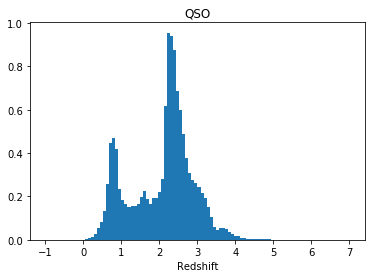

In [17]:
ii=C_P==3
oo=C_P==30
Z_VI_QSO=Z_VI[ii]
Z_VI_QSO_BAL=Z_VI[oo]
plt.hist(Z_VI_QSO,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO')


Text(0.5, 1.0, 'QSO_BAL')

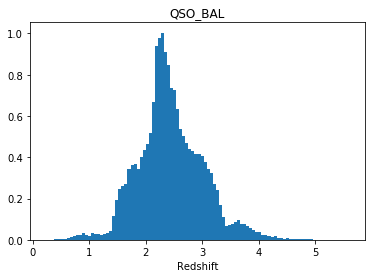

In [18]:
plt.hist(Z_VI_QSO_BAL,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO_BAL')

Filename: data_dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (886, 639464)   float64   
  1                1 BinTableHDU     16   639464R x 4C   [J, J, J, J]   
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f93bf688550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f94d597a6a0>] /n ColDefs(
    name = 'TARGETID'; format = 'J'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
)
[ 87897905  96906927  96907939 ... 505037917 506611870 510289698]


/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


['000000.18+282535.8' '000000.22+275753.3' '000000.28-073054.8' ...
 '235959.80+274621.3' '235959.83+344315.0' '235959.98+344449.6']


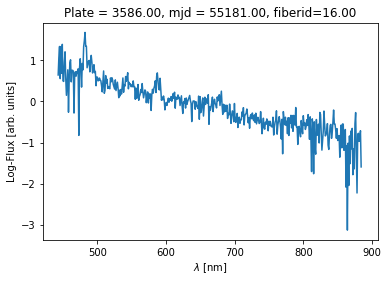

In [19]:
# Reading data from data_dr12.fits. This file had the spectra from data dr12. 
hdul_2 = fits.open('data_dr12.fits') # Open file
info=hdul_2.info() # File info 
columns=hdul_2[1].columns # File Columns 
print(hdul,'/n',columns)
data2=hdul_2[1].data # Database of spectra
spectra=hdul_2[0].data # Spectrum of each object 


# The Spectra in this database have three main parameters: Plate ID, The modified julian day and fiber ID of the observation.
# Let's take a look of the first spectrum.
x=np.linspace(443,886,443) # I cut the sample to 443 pixels in spaced log-wavelength.  
zero_spectrum=spectra[0] #First spectrum
zero_spectrum=zero_spectrum[:443]

PLATE=data2['PLATE'] # Spectra's Plate ID
MJD=data2['MJD'] # Spectra's the modified juliam day
FIBERID=data2['FIBERID'] # Spectra's fiber ID

zero_plate=PLATE[0] # zero spectrum Plate ID
zero_mjd=MJD[0] # zero spectrum MJD
zero_fiberid=FIBERID[0] # zero spectrum Fiber ID
param = 'Plate = {:.2f}, mjd = {:.2f}, fiberid={:.2f}'.format(zero_plate, zero_mjd, zero_fiberid)
plt.plot(x,np.log(zero_spectrum))
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Log-Flux [arb. units]')
plt.title(param)
plt.savefig('spectrum.png')

# I noticed that each object and spectrum don't have the same label. So it's imposible to make some ID correlations.  
print(data2['TARGETID'])
print(data['SDSS_NAME'])
# So, in orden to make a correlation betwen identified object and spectrum we need to use all three parameters (Plate ID, MJD, FiberID)

In [22]:
######################__________________Report 02__________________######################

## This week I pretend to find some correaltions betwen objects with human-expert classification and spretum from DR12

# Subset of PLATE parameters of both data
data_PLATE_1=data['PLATE']
data_PLATE_2=data2['PLATE']

# Subset of MJD parameters of both data
data_MJD_1=data['MJD']
data_MJD_2=data2['MJD']

# Subset of FIBERID parameters of both data
data_FIBERID_1=data['FIBERID']
data_FIBERID_2=data2['FIBERID']

# I make here an intersecting set for all three parameters (PLATE, MJD, FIBERID) in both data.
data_PLATE_CO=np.intersect1d(data_PLATE_1,data_PLATE_2)
data_MJD_CO=np.intersect1d(data_MJD_1,data_MJD_2)
data_FIBERID_CO=np.intersect1d(data_FIBERID_1,data_FIBERID_2)

# As we can see, in both database, there is a correlation betwen the number of Plates, the modified julian day and the Fiber ID. 
print('Number of Plates use in both datasets:',data_PLATE_CO.shape)
print('Number of MJD use in both datasets:',data_MJD_CO.shape)
print('Number of FIBERID use in both datasets:',data_FIBERID_CO.shape)
#print(data_PLATE_1.dtype)

Number of Plates use in both datasets: (2401,)
Number of MJD use in both datasets: (681,)
Number of FIBERID use in both datasets: (1000,)


In [23]:
# I create two DataFrame for Superset_DR12Q and data_dr12 with only three parameters
data={'PLATE':data_PLATE_1,'MJD':data_MJD_1,'FIBERID':data_FIBERID_1}
data=pd.DataFrame(data=data)

data2={'PLATE':data_PLATE_2,'MJD':data_MJD_2,'FIBERID':data_FIBERID_2}
data2=pd.DataFrame(data=data2)

In [24]:
# I convert all objects in both set to string chain in orden to combine them as one new ID.
data['PLATE']=data['PLATE'].astype(str)
data['MJD']=data['MJD'].astype(str)
data['FIBERID']=data['FIBERID'].astype(str)
data['PM'] = data['PLATE'].str.cat(data['MJD'],sep="-")
data['NEWID'] = data['PM'].str.cat(data['FIBERID'],sep="-")
data_1=data.drop(columns=['PLATE','MJD','FIBERID','PM']).values # New set of database 2 with new ID's
print(data_1.shape)

data2['PLATE']=data2['PLATE'].astype(str)
data2['MJD']=data2['MJD'].astype(str)
data2['FIBERID']=data2['FIBERID'].astype(str)
data2['PM'] = data2['PLATE'].str.cat(data2['MJD'],sep="-")
data2['NEWID'] = data2['PM'].str.cat(data2['FIBERID'],sep="-")
data_2=data2.drop(columns=['PLATE','MJD','FIBERID','PM']).values # New set of database 2 with new ID's
print(data_2.shape)


(546856, 1)
(639464, 1)


In [25]:
# With the routine of numpy intersect1d, I find the intersections elements in both sets. This elements  
data_CO=np.array(np.intersect1d(data_1,data_2,return_indices=True))

data_CO_objects=data_CO[0] # The unique new ID of each element in both sets
data_CO_ind1=data_CO[1] # Indices of intersected elements from the original data 1 (Superset_DR12Q.fits) 
data_CO_ind2=data_CO[2] # Indices of intersected elements form the original data 2 (data_dr12.fits)
print('I find',len(data_CO_objects),'objects with their spectrum from DR12')

I find 537677 objects with their spectrum from DR12


In [28]:
# Now that I know which object have a spectrum. I can make a unique database of objects and spectra
hdul = fits.open('Superset_DR12Q.fits')
data=hdul[1].data

ti=data['THING_ID']
cp=data['CLASS_PERSON']
z=data['Z_VI']
zc=data['Z_CONF_PERSON']
d={'THING_ID':ti,'CLASS_PERSON':cp,'Z_VI':z,'Z_CONF_PERSON':zc}
data_0=pd.DataFrame(data=d).values #super database

print(data_0)

[[3.57405338e+08 1.00000000e+00 0.00000000e+00 3.00000000e+00]
 [3.53907506e+08 1.00000000e+00 0.00000000e+00 3.00000000e+00]
 [3.31808140e+07 1.00000000e+00 0.00000000e+00 3.00000000e+00]
 ...
 [3.52121795e+08 1.00000000e+00 0.00000000e+00 3.00000000e+00]
 [4.01440280e+08 3.00000000e+00 3.10900000e+00 3.00000000e+00]
 [4.01440241e+08 3.00000000e+01 2.37500000e+00 3.00000000e+00]]
